### About  
Transformers plays a very important role in the power system. Though they are some of the most reliable component of the electrical grid they are also prone to failure due to many factors both internal or external. There could be many initiators which cause a transformer failure, but those which can potentially lead to catastrophic failure are the following:
- Mechanical Failure
- Dielectric Failure

### Content 
This data is collected via IoT devices from June 25th, 2019 to April 14th, 2020 which was updated every 15 minutes.
Parameters Description:

CurrentVoltage:
- VL1- Phase Line 1
- VL2- Phase Line 2
- VL3- Phase Line 3
- IL1- Current Line 1
- IL2- Current Line 2
- IL3- Current Line 3
- VL12- Voltage line 1 2
- VL23- Voltage line 2 3
- VL31- Voltage line 3 1
- INUT- Neutral Current

Overview:
- OTI- Oil Temperature Indicator
- WTI- Winding Temperature Indicator
- ATI- Ambient Temperature Indicator
- OLI- Oil Level Indicator
- OTI_A- Oil Temperature Indicator Alarm
- OTI_T- Oil Temperature Indicator Trip
- MOG_A- Magnetic oil gauge indicator



In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import functools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import AdamW
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Transformer  
tf = pd.read_csv('./data/Overview.csv')
display(tf.shape) 
tf.head()

(20316, 8)

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A
0,2019-06-25T13:06,0.0,0.0,0.0,37.0,0.0,0.0,0.0
1,2019-06-25T13:09,0.0,0.0,0.0,37.0,0.0,0.0,0.0
2,2019-06-27T10:49,0.0,0.0,0.0,38.0,0.0,0.0,0.0
3,2019-06-27T10:51,0.0,0.0,0.0,38.0,0.0,0.0,0.0
4,2019-06-27T10:52,0.0,0.0,0.0,39.0,0.0,0.0,0.0


In [3]:
# convert these columns 'WTI', 'OTI_A', 'OTI_T', 'MOG_A' to inteber data type
tf['WTI'] = tf['WTI'].astype(int)
tf['OTI_A'] = tf['OTI_A'].astype(int)
tf['OTI_T'] = tf['OTI_T'].astype(int)
tf['MOG_A'] = tf['MOG_A'].astype(int)

In [4]:
# Converting to datetime datatype
tf['DeviceTimeStamp'] = pd.to_datetime(tf['DeviceTimeStamp'],format='ISO8601')
tf.head()

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A
0,2019-06-25 13:06:00,0.0,0,0.0,37.0,0,0,0
1,2019-06-25 13:09:00,0.0,0,0.0,37.0,0,0,0
2,2019-06-27 10:49:00,0.0,0,0.0,38.0,0,0,0
3,2019-06-27 10:51:00,0.0,0,0.0,38.0,0,0,0
4,2019-06-27 10:52:00,0.0,0,0.0,39.0,0,0,0


In [5]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20316 entries, 0 to 20315
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DeviceTimeStamp  20316 non-null  datetime64[ns]
 1   OTI              20316 non-null  float64       
 2   WTI              20316 non-null  int32         
 3   ATI              20316 non-null  float64       
 4   OLI              20316 non-null  float64       
 5   OTI_A            20316 non-null  int32         
 6   OTI_T            20316 non-null  int32         
 7   MOG_A            20316 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(4)
memory usage: 952.4 KB


In [6]:
cv = pd.read_csv('./data/CurrentVoltage.csv')
display(cv.shape)
cv.head()

(19352, 11)

,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,2019-06-25T13:06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-27T10:49,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-27T10:51,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-27T10:52,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-27T10:52,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19352 entries, 0 to 19351
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DeviceTimeStamp  19352 non-null  object 
 1   VL1              19352 non-null  float64
 2   VL2              19352 non-null  float64
 3   VL3              19352 non-null  float64
 4   IL1              19352 non-null  float64
 5   IL2              19352 non-null  float64
 6   IL3              19352 non-null  float64
 7   VL12             19352 non-null  float64
 8   VL23             19352 non-null  float64
 9   VL31             19352 non-null  float64
 10  INUT             19352 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


# Convert datetime datatype

In [8]:
# Converting to datetime datatype
cv['DeviceTimeStamp'] = pd.to_datetime(cv['DeviceTimeStamp'],format='ISO8601')
cv.head()

,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,2019-06-25 13:06:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-27 10:49:00,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-27 10:51:00,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
dataframes = [tf, cv]
transformer_df = functools.reduce(lambda left, right: pd.merge(left, right, on="DeviceTimeStamp"), dataframes)

In [10]:
transformer_df['Fault_Type'] = transformer_df[['WTI', 'OTI_A', 'OTI_T', 'MOG_A']].astype(str).agg(''.join, axis=1)

# Prep Summary

- 19248 (from *TotalPower.csv*) is the minimum number of rows from each dataset
- 4 potential target attributes for binary classification (failure/no failure)
  - `Overview.csv`
    - WTI: Winding Temperature Indicator
    - OTI_A: Oil Temperature Indicator Alarm
    - OTI_T: Oil Temperature Indicator Trip
    - MOG_A: Magnetic Oil Gauge Indicator

In [11]:
targets = ['WTI', 'OTI_A', 'OTI_T', 'MOG_A']

In [12]:
transformer_df.columns

Index(['DeviceTimeStamp', 'OTI', 'WTI', 'ATI', 'OLI', 'OTI_A', 'OTI_T',
       'MOG_A', 'VL1', 'VL2', 'VL3', 'IL1', 'IL2', 'IL3', 'VL12', 'VL23',
       'VL31', 'INUT', 'Fault_Type'],
      dtype='object')

In [13]:
transformer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20465 entries, 0 to 20464
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DeviceTimeStamp  20465 non-null  datetime64[ns]
 1   OTI              20465 non-null  float64       
 2   WTI              20465 non-null  int32         
 3   ATI              20465 non-null  float64       
 4   OLI              20465 non-null  float64       
 5   OTI_A            20465 non-null  int32         
 6   OTI_T            20465 non-null  int32         
 7   MOG_A            20465 non-null  int32         
 8   VL1              20465 non-null  float64       
 9   VL2              20465 non-null  float64       
 10  VL3              20465 non-null  float64       
 11  IL1              20465 non-null  float64       
 12  IL2              20465 non-null  float64       
 13  IL3              20465 non-null  float64       
 14  VL12             20465 non-null  float

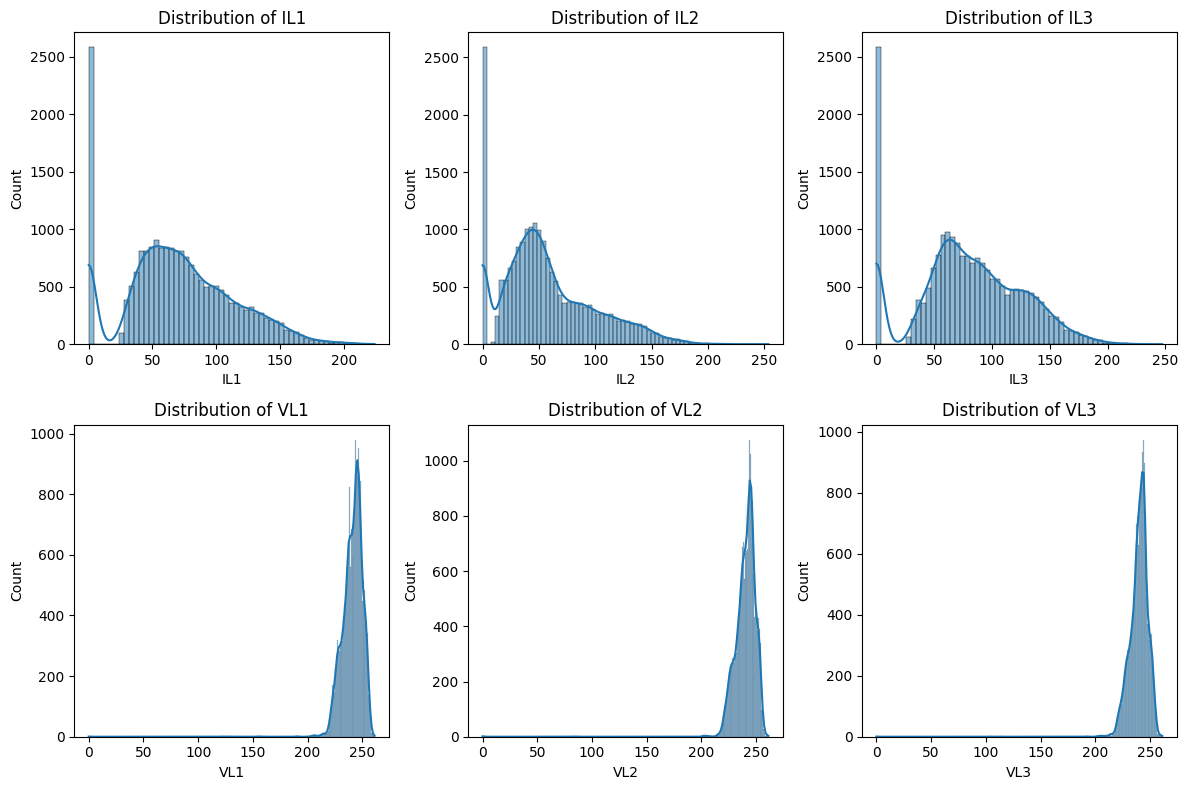

In [14]:
# Data Visualization: Histograms for each feature
features = ['IL1', 'IL2', 'IL3', 'VL1', 'VL2', 'VL3']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(transformer_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Checking Data Quality

In [15]:
# Checking for missing values
print("\nChecking for missing values:")
missing_values = transformer_df.isnull().sum() # null NaN

# Checking for any duplicates
duplicate_rows = transformer_df.duplicated().sum()

missing_values,duplicate_rows


Checking for missing values:


(DeviceTimeStamp    0
 OTI                0
 WTI                0
 ATI                0
 OLI                0
 OTI_A              0
 OTI_T              0
 MOG_A              0
 VL1                0
 VL2                0
 VL3                0
 IL1                0
 IL2                0
 IL3                0
 VL12               0
 VL23               0
 VL31               0
 INUT               0
 Fault_Type         0
 dtype: int64,
 981)

In [16]:
# Descriptive statistics
print("\nDescriptive Statistics:")
transformer_df.describe()


Descriptive Statistics:


,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
count,20465,20465.000000,20465.000000,20465.000000,20465.000000,20465.000000,20465.000000,20465.000000,20465.000000,20465.000000,20465.000000,20465.000000,20465.000000,20465.000000,20465.000000,20465.000000,20465.000000,20465.000000
mean,2019-11-01 06:07:16.802345472,30.084974,0.259614,27.770291,69.685561,0.003616,0.001613,0.100024,241.054298,240.518471,239.948307,70.640137,56.540704,79.806504,364.269900,363.370222,364.753975,25.231747
min,2019-06-25 13:06:00,0.000000,0.000000,0.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019-08-15 13:30:00,26.000000,0.000000,24.000000,40.000000,0.000000,0.000000,0.000000,235.800000,235.500000,235.500000,43.700000,28.800000,53.200000,397.700000,398.500000,399.300000,15.400000
50%,2019-10-18 20:00:00,30.000000,0.000000,28.000000,64.000000,0.000000,0.000000,0.000000,242.400000,241.900000,241.000000,67.500000,48.700000,77.700000,416.300000,415.400000,416.600000,24.800000
75%,2020-01-27 15:15:00,34.000000,1.000000,32.000000,100.000000,0.000000,0.000000,0.000000,247.300000,246.500000,245.100000,98.300000,80.200000,111.800000,427.200000,425.000000,427.300000,35.200000
max,2020-04-14 00:30:00,248.000000,1.000000,44.000000,100.000000,1.000000,1.000000,1.000000,261.200000,261.300000,261.300000,224.100000,253.600000,247.300000,446.500000,444.800000,447.300000,145.800000
std,NaN,10.710617,0.438434,5.742023,27.778116,0.060025,0.040125,0.300040,9.243036,9.645709,8.551468,42.819608,41.185621,45.669723,139.137449,138.572355,139.285162,15.674539


# Correlation

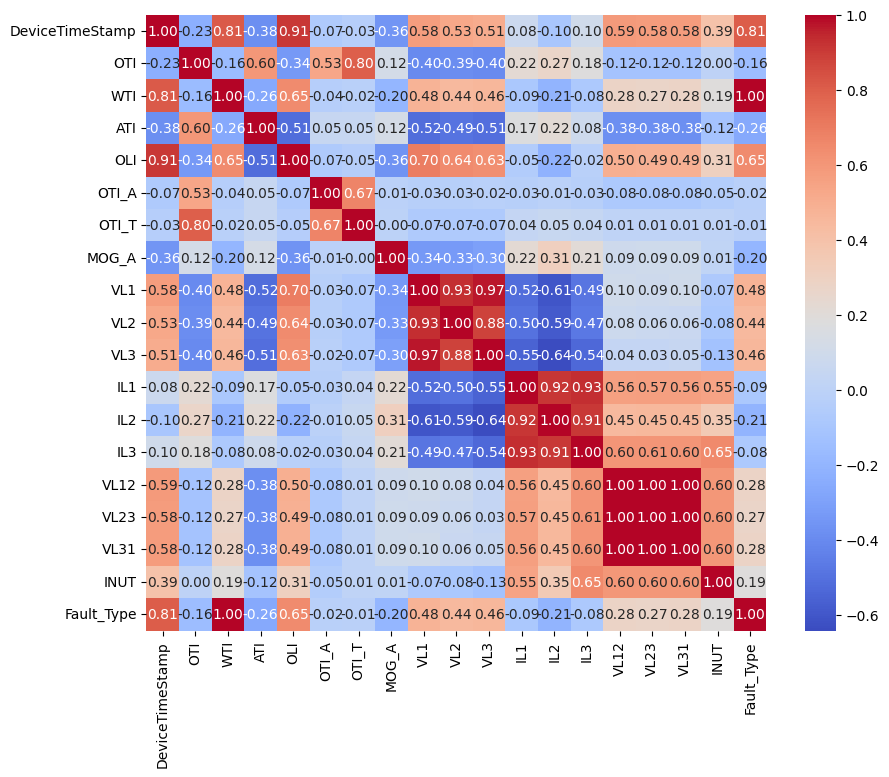

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(transformer_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [18]:
abs_corr = transformer_df.corr()[['WTI', 'OTI_A', 'OTI_T', 'MOG_A']].abs()
abs_corr = abs_corr.sum(numeric_only=True, axis=0)
abs_corr

WTI      6.902853
OTI_A    2.894692
OTI_T    2.995649
MOG_A    4.358090
dtype: float64

# Visualization

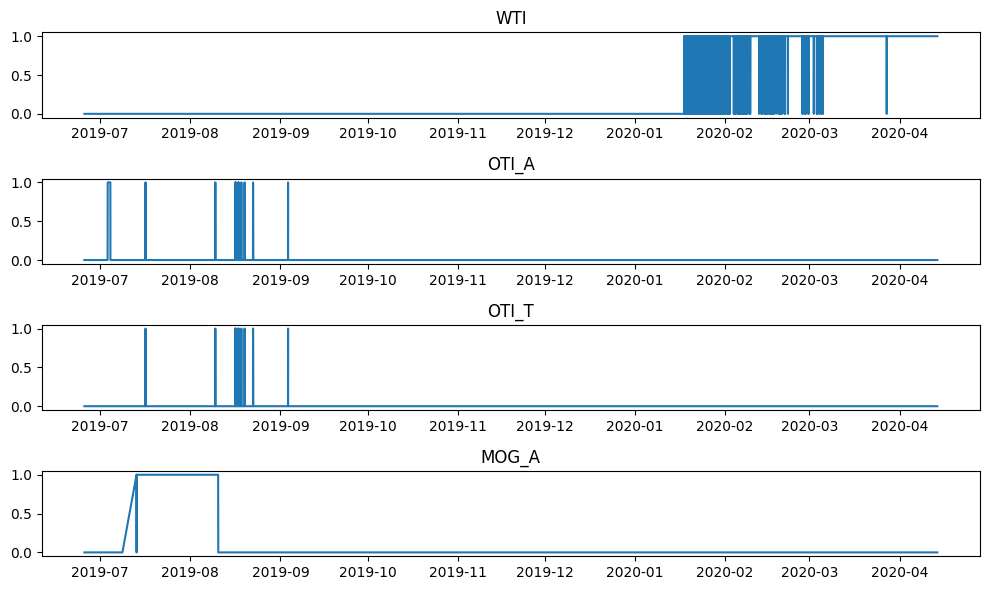

In [19]:
fig, axs = plt.subplots(4,1,figsize=(10, 6))
axs = axs.flatten()
for i, t in enumerate(zip(axs, targets)):
    ax = t[0]
    targ = t[1]
    ax.plot(transformer_df['DeviceTimeStamp'], transformer_df[targ], label=targ)
    ax.set_title(targ)
plt.tight_layout()
plt.show()

WTI appears to have the best summation of absolute-valued correlations amongst the data

# Transformer Parameter Visualization

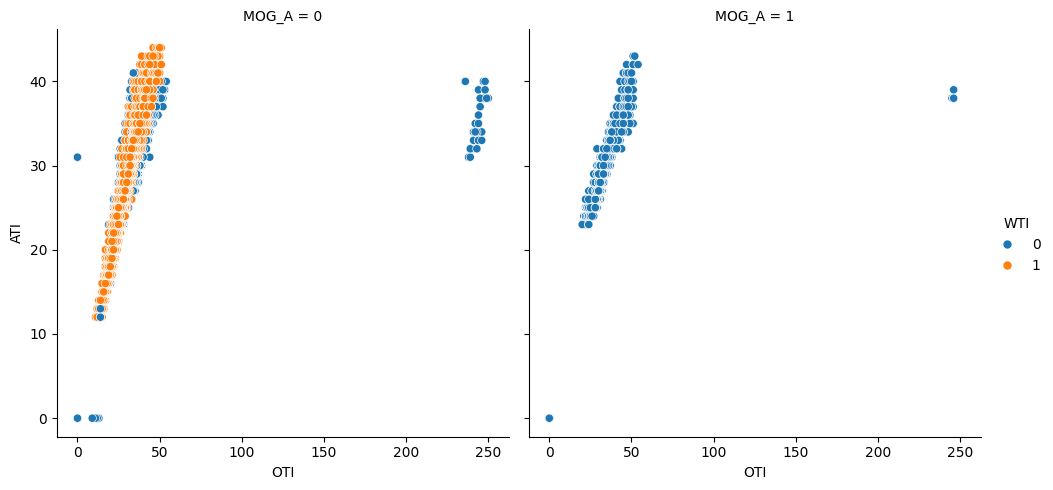

In [20]:
sns.relplot(data=tf, x="OTI", y="ATI", hue="WTI",col="MOG_A");

# Oil Temperature

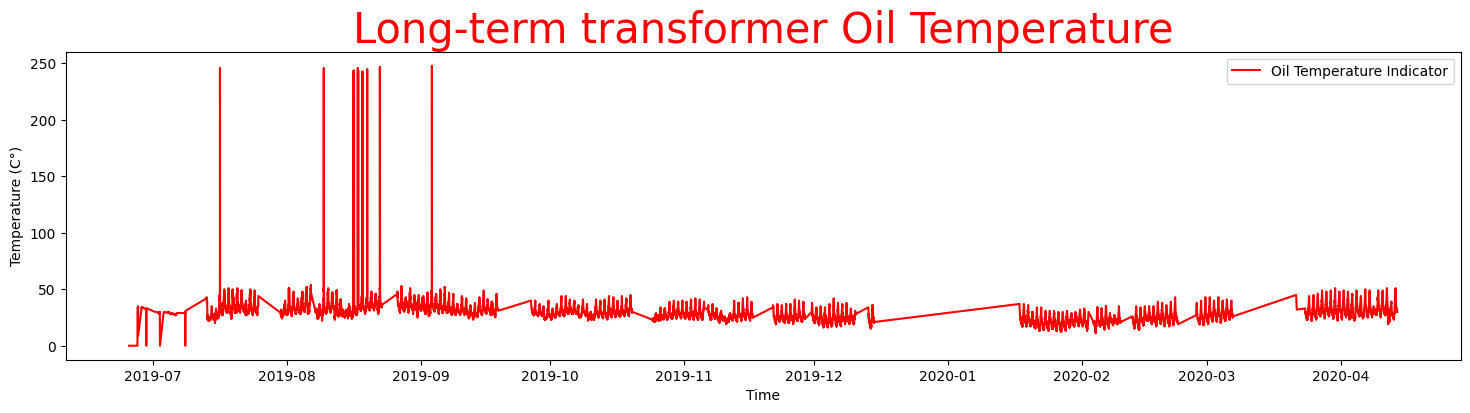

In [21]:
# Oil Temperature
plt.figure(figsize=(18,4))

plt.plot(transformer_df.DeviceTimeStamp, transformer_df.OTI, label="Oil Temperature Indicator",color='red')
plt.title("Long-term transformer Oil Temperature",fontsize = 30,color='Red')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Temperature (C°)")
plt.show() 

# Winding Temperature Indicator Alarm

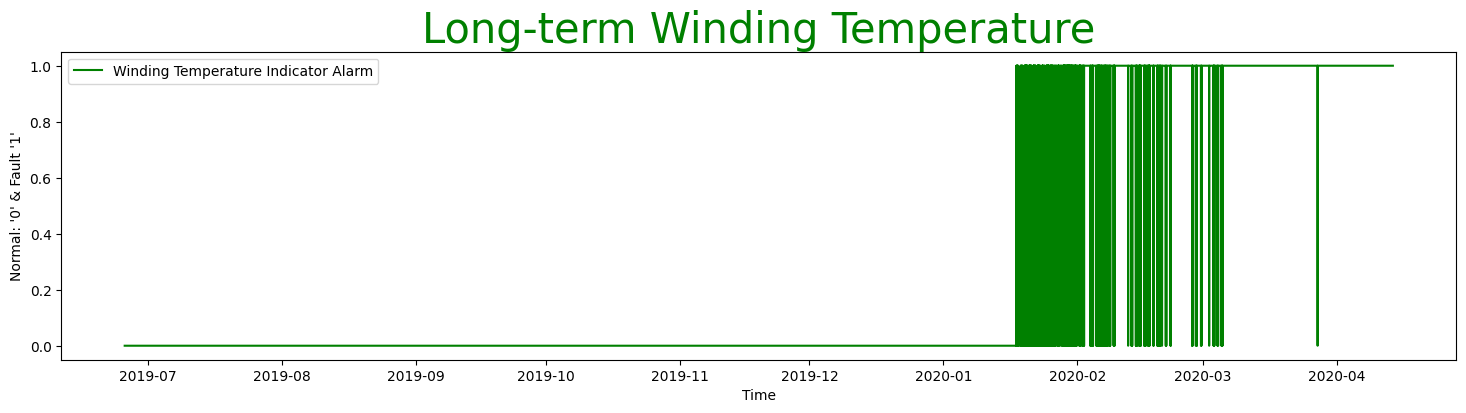

In [22]:
# Winding Temperature Indicator Alarm
plt.figure(figsize=(18,4))

plt.plot(transformer_df.DeviceTimeStamp, transformer_df.WTI, label="Winding Temperature Indicator Alarm",color='green')
plt.title("Long-term Winding Temperature",fontsize = 30,color='Green')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Normal: '0' & Fault '1'")
plt.show() 

# Oil Temperature Indicator Alarm OTIT

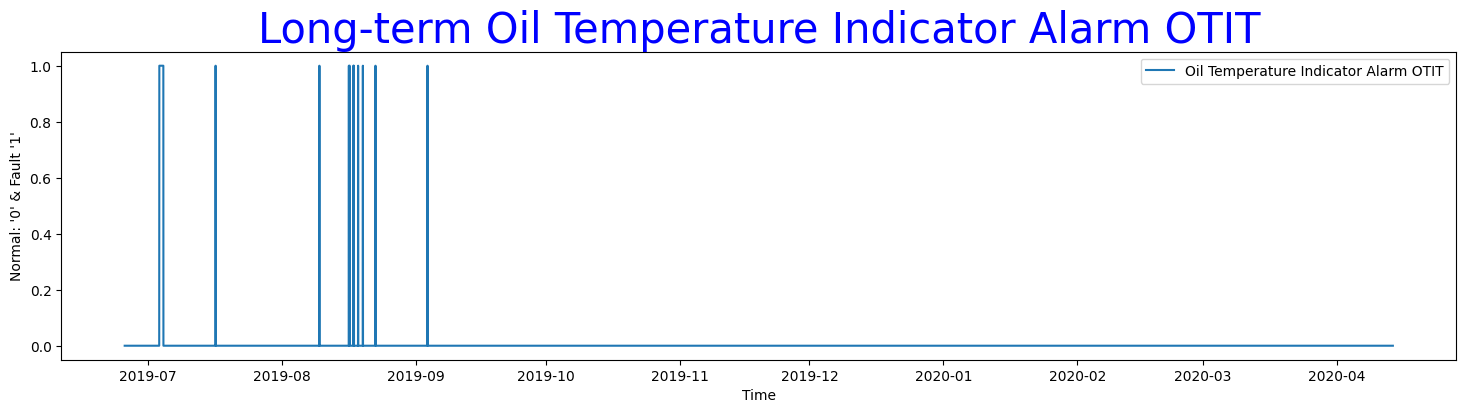

In [23]:
# Oil Temperature Indicator Alarm OTIT

plt.figure(figsize=(18,4))
plt.plot(transformer_df.DeviceTimeStamp, transformer_df.OTI_A, label="Oil Temperature Indicator Alarm OTIT")
plt.title("Long-term Oil Temperature Indicator Alarm OTIT",fontsize = 30,color='Blue')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Normal: '0' & Fault '1'")
plt.show() 

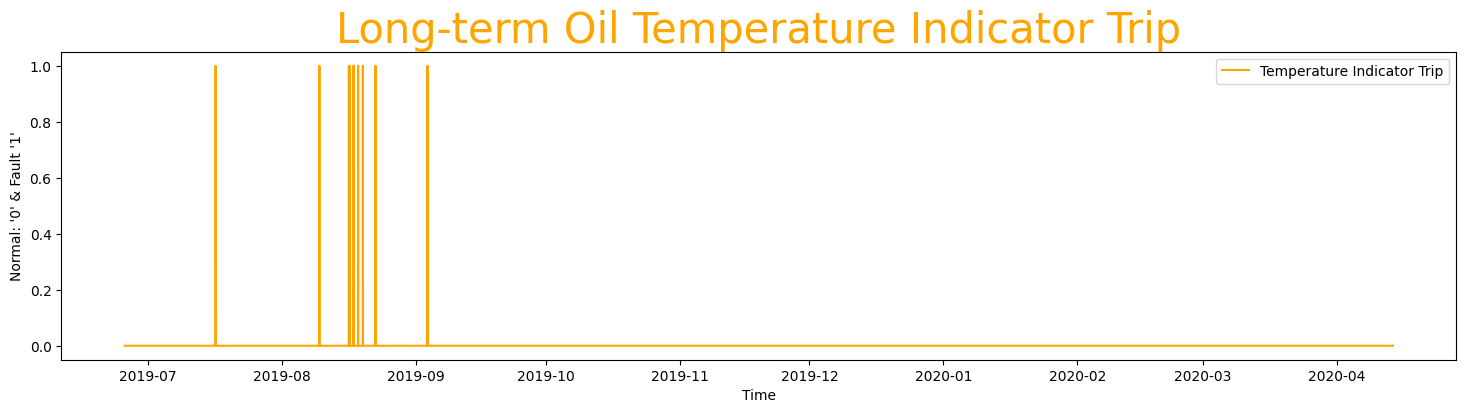

In [24]:
plt.figure(figsize=(18,4))
plt.plot(transformer_df.DeviceTimeStamp, transformer_df.OTI_T, label="Temperature Indicator Trip",color='Orange')
plt.title("Long-term Oil Temperature Indicator Trip",fontsize = 30,color='Orange')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Normal: '0' & Fault '1'")
plt.show() 

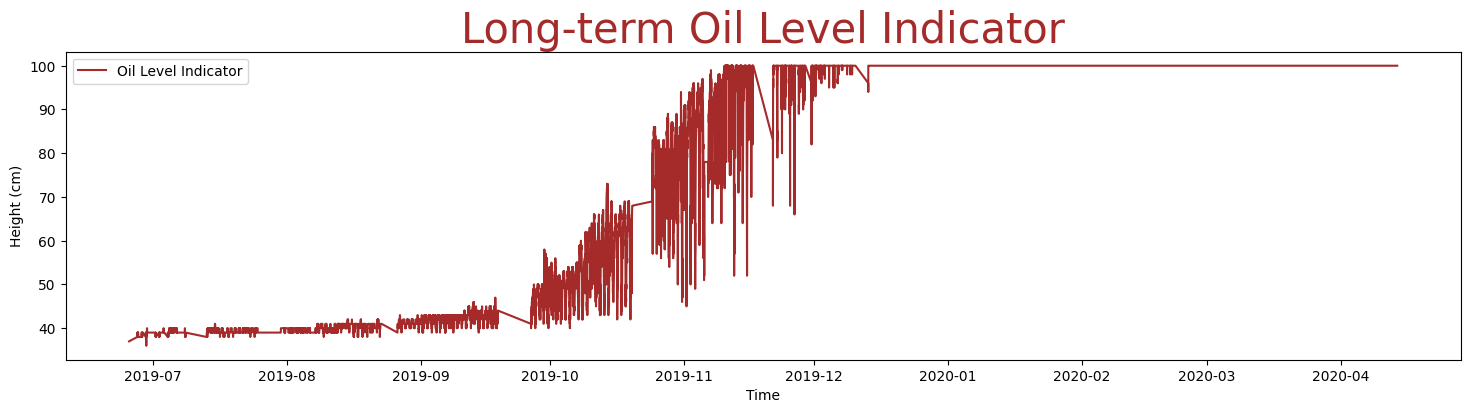

In [25]:
plt.figure(figsize=(18,4))
plt.plot(transformer_df.DeviceTimeStamp, transformer_df.OLI, label="Oil Level Indicator",color='Brown')
plt.title("Long-term Oil Level Indicator",fontsize = 30,color='Brown')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Height (cm)")
plt.show() 

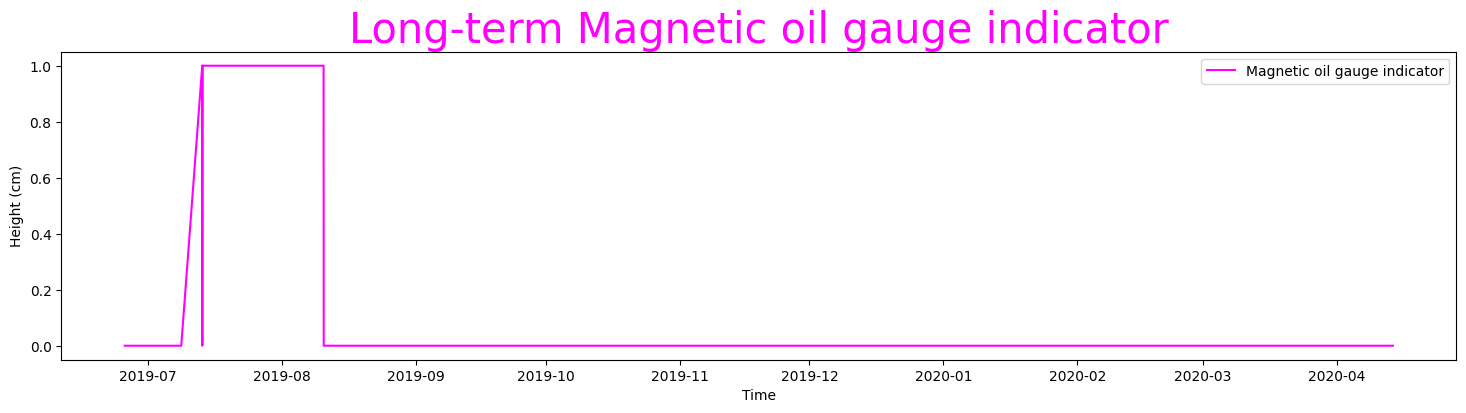

In [26]:
plt.figure(figsize=(18,4))

plt.plot(transformer_df.DeviceTimeStamp, transformer_df.MOG_A, label="Magnetic oil gauge indicator",color='Magenta')
plt.title("Long-term Magnetic oil gauge indicator",fontsize = 30,color='Magenta')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Height (cm)")
plt.show() 

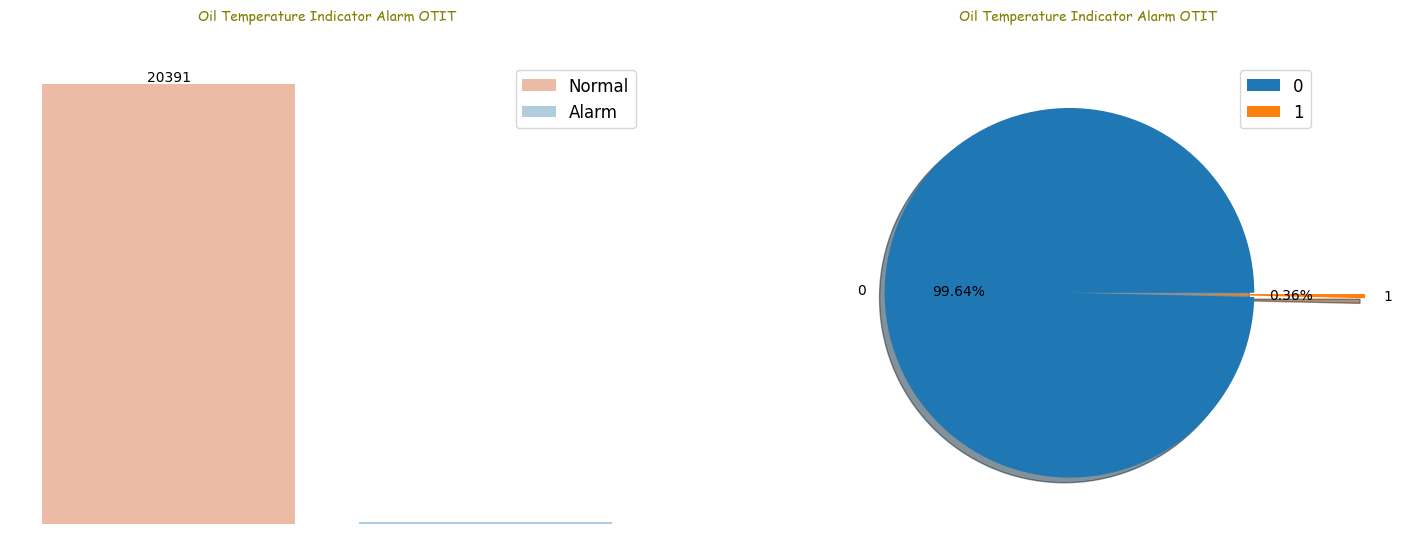

In [27]:
plt.rcParams['legend.fontsize'] = 12
plt.rcParams["axes.labelsize"] = 20

plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='OTI_A', data=transformer_df, palette='RdBu')
ax.bar_label(ax.containers[0])
plt.title("Oil Temperature Indicator Alarm OTIT", fontsize=20,color='Olive',font='Comic Sans MS',pad=30)
plt.legend(labels=['Normal','Alarm'])
plt.axis('off');

ax =plt.subplot(1,2,2)
ax=transformer_df['OTI_A'].value_counts().plot.pie(explode=[0.1, 0.5],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Oil Temperature Indicator Alarm OTIT", fontsize = 20,color='Olive',font='Comic Sans MS',pad= 30);
plt.legend()
plt.axis('off');

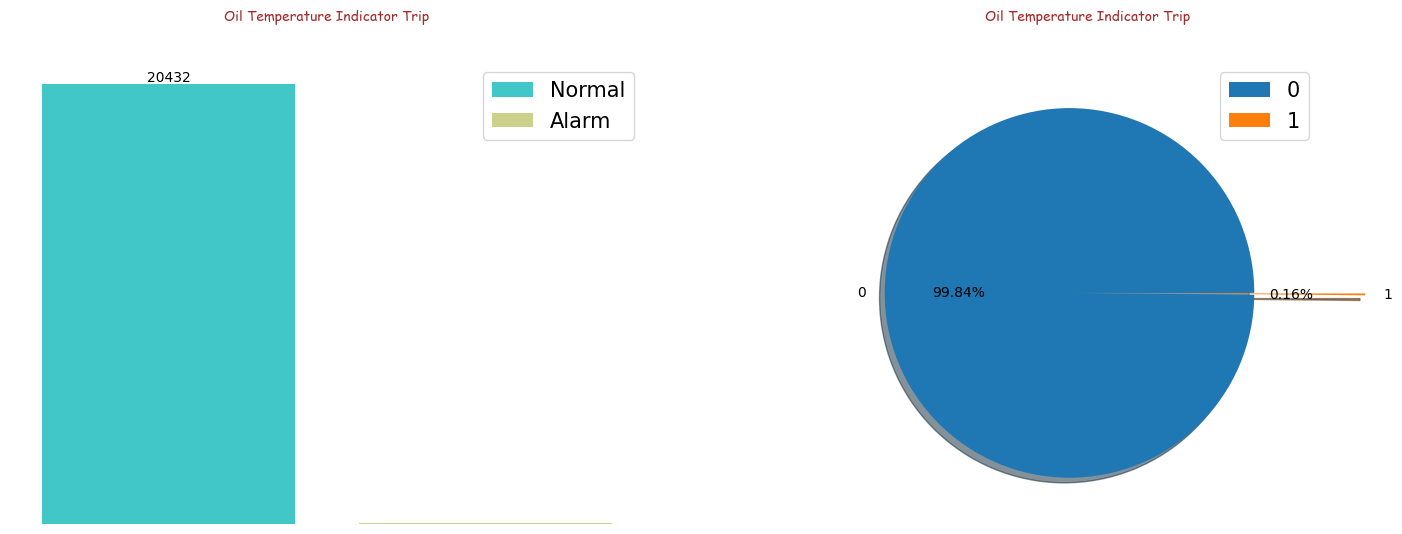

In [28]:
plt.rcParams['legend.fontsize'] = 15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.labelcolor"] = 'brown'

plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='OTI_T', data=transformer_df, palette='rainbow')
ax.bar_label(ax.containers[0])
plt.title("Oil Temperature Indicator Trip", fontsize=30,color='Brown',font='Comic Sans MS',pad=30)
plt.legend(labels=['Normal','Alarm'])
plt.axis('off');

ax =plt.subplot(1,2,2)
ax=transformer_df['OTI_T'].value_counts().plot.pie(explode=[0.1, 0.5],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Oil Temperature Indicator Trip", fontsize = 30,color='Brown',font='Comic Sans MS',pad= 30);
plt.legend()
plt.axis('off');

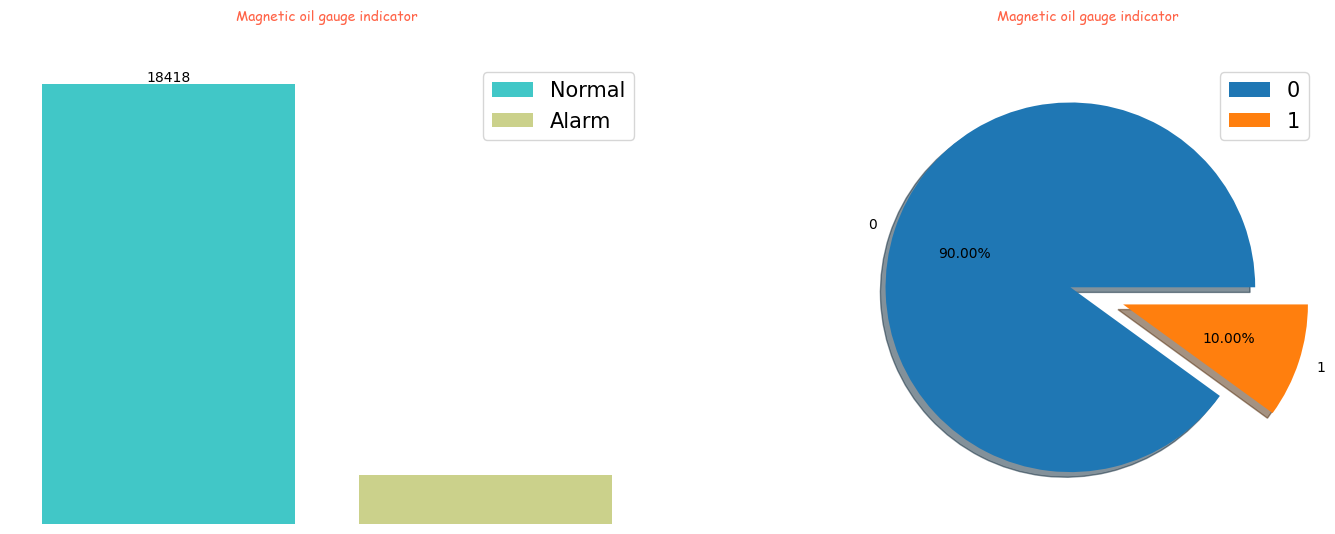

In [29]:
plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='MOG_A', data=transformer_df, palette='rainbow')
ax.bar_label(ax.containers[0])
plt.title("Magnetic oil gauge indicator", fontsize=30,color='Tomato',font='Comic Sans MS',pad=30)
plt.legend(labels=['Normal','Alarm'])
plt.axis('off');

ax =plt.subplot(1,2,2)
ax=transformer_df['MOG_A'].value_counts().plot.pie(explode=[0.1, 0.2],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Magnetic oil gauge indicator", fontsize = 30,color='Tomato',font='Comic Sans MS',pad= 30);
plt.legend()
plt.axis('off');

# Helper Function

In [30]:
def split_and_scale(feature):
    X = transformer_df.drop(['DeviceTimeStamp', feature],axis=1)
    y = transformer_df[feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)
    kfold = StratifiedKFold(n_splits=10)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test, kfold

def cross_val(classifiers, X_train, y_train, kfold):
    cv_results = []
    for classifier in classifiers.values():
        cv_score = cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4)
        cv_results.append(cv_score)

    cv_means = [i.mean() for i in cv_results]
    cv_std = [i.std() for i in cv_results]
    cv_res = pd.DataFrame({
        "CrossValMeans": cv_means, 
        "CrossValerrors": cv_std, 
        "Algorithm": classifiers.keys()
    })
    return cv_results, cv_means, cv_std, cv_res


def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.3f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.3f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

def plot_mean_accuracy(cv_res, cv_std, target):
    _, ax = plt.subplots(figsize=(8, 6))
    g = sns.barplot(ax=ax, data=cv_res, x="CrossValMeans", y="Algorithm", palette="Set3", orient = "h",**{'xerr': cv_std})
    g.set_xlabel("Mean Accuracy")
    g.set_title(target + " Cross validation scores")
    show_values(g, "h", space=0)
    
    
# def model_test(model, parameters, X_train, X_test, y_train, y_test):
#     classifiers[model] = GridSearchCV(classifiers[model], parameters, cv=4, verbose=1, n_jobs=6)
#     start = time.time()
#     classifiers[model].fit(X_train, y_train)
#     stop = time.time()
#     print(f"Training time: {stop - start}s")
#     print(f"Best parameters: {classifiers[model].best_params_}")
#     y_hat = classifiers[model].predict(X_test)
#     cfm = confusion_matrix(y_test, y_hat)
#     print(f'Confusion Matrix: \n{cfm}')
#     print(f'{model}: {accuracy_score(y_hat, y_test)*100 :.2f}%')
    


# Split Data

In [31]:
X_train, X_test, y_train, y_test, kfold = split_and_scale('MOG_A')

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14325, 17), (6140, 17), (14325,), (6140,))

In [33]:
y_train.value_counts()

MOG_A
0    12904
1     1421
Name: count, dtype: int64

# Normalize Data

In [34]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

In [35]:
# show the shape of the train and test data
X_train.shape, X_test.shape

((14325, 17), (6140, 17))

In [36]:
y_train.shape, y_test.shape

((14325,), (6140,))

In [37]:
y_train.value_counts(), y_test.value_counts()

(MOG_A
 0    12904
 1     1421
 Name: count, dtype: int64,
 MOG_A
 0    5514
 1     626
 Name: count, dtype: int64)

In [38]:
len(set(y_train)) # number of output clases

2

In [39]:
# create ANN model with back propagation

# Define the model
# model = Sequential([
#     # First hidden layer with ReLU activation and dropout for regularization
#     Dense(units=64, activation="relu", input_shape=(X_train.shape[1],)),
#     Dropout(rate=0.2),
#     # Second hidden layer with ReLU activation and dropout
#     Dense(units=32, activation="relu"),
#     Dropout(rate=0.2),
#     # Third hidden layer with ReLU activation
#     Dense(units=16, activation="relu"),
#     # Output layer with softmax activation
#     Dense(units=len(set(y_train)), activation="softmax")
# ])

model = Sequential([
    # First hidden layer with ReLU activation and dropout for regularization
    Dense(units=64, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(rate=0.2),
    # Second hidden layer with ReLU activation and dropout
    Dense(units=32, activation="relu"),
    Dropout(rate=0.2),
    # Third hidden layer with ReLU activation
    Dense(units=16, activation="relu"),
    # Output layer with softmax activation
    Dense(units=1, activation="sigmoid")  # [0.0056, 0.001] -> 0.0056 -> [1, 0]
])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)


In [40]:
# Compile the model with AdamW optimizer
model.compile(loss="binary_crossentropy", optimizer=AdamW(learning_rate=0.001), metrics=["accuracy"])

In [41]:
history = model.fit(
    x=X_train,
    y=y_train,
    epochs=100, # 16000 * 100
    batch_size=32,
    validation_data=(X_test,y_test),
    callbacks=[early_stop]
)

Epoch 1/100


448/448 [==============================] - 4s 4ms/step - loss: 0.2316 - accuracy: 0.8981 - val_loss: 0.1648 - val_accuracy: 0.8980
Epoch 2/100
448/448 [==============================] - 2s 4ms/step - loss: 0.1565 - accuracy: 0.9181 - val_loss: 0.1261 - val_accuracy: 0.9226
Epoch 3/100
448/448 [==============================] - 2s 4ms/step - loss: 0.1262 - accuracy: 0.9403 - val_loss: 0.0912 - val_accuracy: 0.9780
Epoch 4/100
448/448 [==============================] - 2s 3ms/step - loss: 0.1061 - accuracy: 0.9502 - val_loss: 0.0726 - val_accuracy: 0.9770
Epoch 5/100
448/448 [==============================] - 2s 4ms/step - loss: 0.0948 - accuracy: 0.9592 - val_loss: 0.0660 - val_accuracy: 0.9779
Epoch 6/100
448/448 [==============================] - 2s 4ms/step - loss: 0.0880 - accuracy: 0.9614 - val_loss: 0.0756 - val_accuracy: 0.9673
Epoch 7/100
448/448 [==============================] - 2s 4ms/step - loss: 0.0871 - accuracy: 0.9628 - val_loss: 0.0736 - val_accuracy: 0.96

In [42]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

192/192 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 0.9938
Test Loss: 0.0176, Test Accuracy: 0.9938


In [43]:
predictions = model.predict(X_test)  # Make predictions on training data for evaluation

192/192 [==============================] - 1s 2ms/step


In [44]:
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]


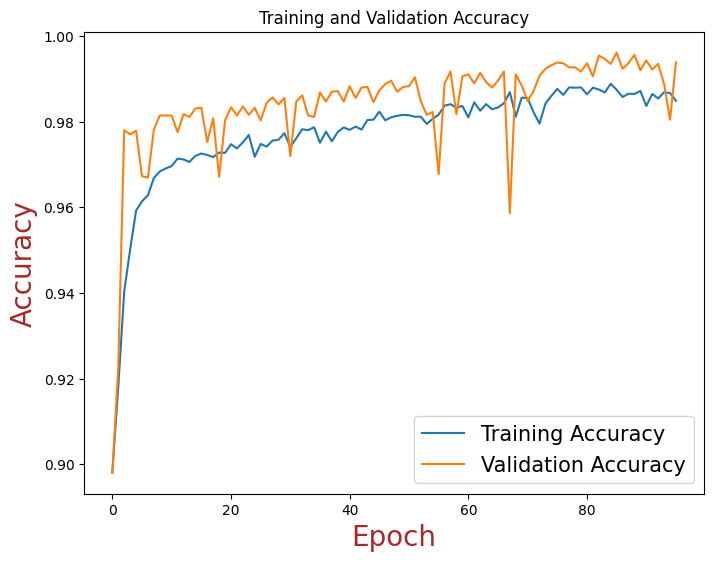

In [45]:
# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(train_acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


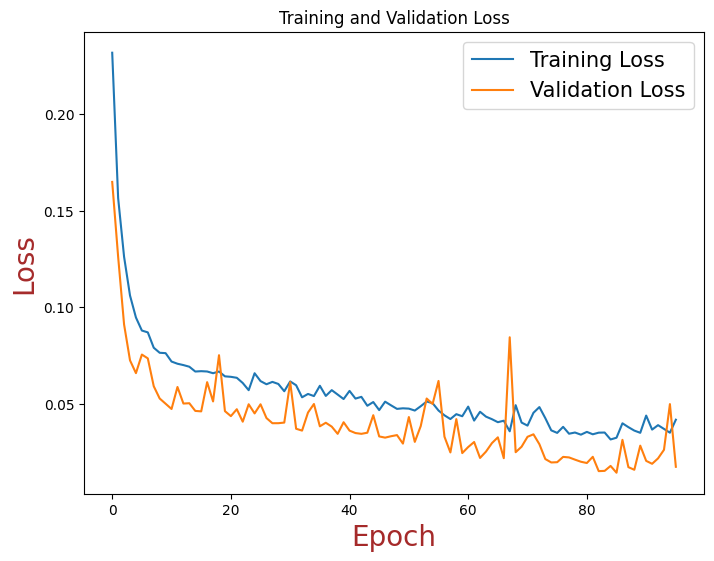

In [46]:
# Plot loss (optional on a separate plot)
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [47]:
# Assuming predictions contains probabilities for each class
predicted_classes = np.argmax(predictions, axis=1)  # Get the class with the highest probability for each sample
predicted_classes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Print or visualize the confusion matrix (using libraries like seaborn)
print(cm)

[[5514    0]
 [ 626    0]]


In [49]:
def plot_confusion_matrix(cm, class_names):
    """
        Plots a confusion matrix with labels and optional normalization.

        Args:
            cm: Confusion matrix (2D numpy array).
            class_names: List of class names (strings).
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, cmap='Blues')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    # plt.tight_layout()
    plt.show()


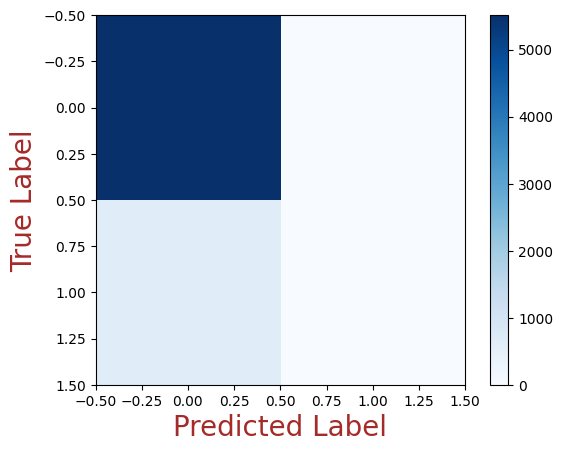

In [50]:
plt.imshow(cm, cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.colorbar()
plt.show()

In [51]:
os.makedirs('./output', exist_ok=True)
model.save('./output/distribution_trainsformer.keras')

In [52]:
# show a dataframe of the prediction and the actual

y_pred = model.predict(X_test)
cross_check = pd.DataFrame({'Actual': y_test, 'Predicted': np.argmax(y_pred, axis=1)})
cross_check.sample(15)

192/192 [==============================] - 0s 2ms/step


,Actual,Predicted
9757,0,0
1029,0,0
1166,0,0
19991,0,0
20098,0,0
7033,0,0
8196,0,0
7305,0,0
9534,0,0
10505,0,0


In [53]:
# check the number of predictions that are correct
cross_check['Correct'] = cross_check['Actual'] == cross_check['Predicted']

In [54]:
cross_check['Correct'].value_counts()

Correct
True     5514
False     626
Name: count, dtype: int64